In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
image_dims = 128
batch_size = 64

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_dims, image_dims, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# The number of nodes in the Dense layer should match the output of the Flatten layer
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Define your image dimensions and batch size
image_dims = 224
batch_size = 32

# Update the input path using a raw string
input_path = r'C:\Users\ARNAB\Desktop\LungsXray\LungsXray\chest_xray'

# Generate Training data:
training_data_generator = ImageDataGenerator(rescale=1./255,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

# Use os.path.join to concatenate paths
training_gen = training_data_generator.flow_from_directory(directory=os.path.join(input_path, 'train'),
                                                            target_size=(image_dims, image_dims),
                                                            batch_size=batch_size,
                                                            class_mode='binary')


Found 5216 images belonging to 2 classes.


In [38]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Use os.path.join to concatenate paths
validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'val'),
                                                                target_size=(image_dims, image_dims),
                                                                batch_size=batch_size,
                                                                class_mode='binary')


Found 16 images belonging to 2 classes.


In [40]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'val'),
                                                               target_size=(image_dims, image_dims),
                                                               batch_size=batch_size,
                                                               class_mode='binary')


Found 16 images belonging to 2 classes.


In [41]:
test_data_generator = ImageDataGenerator(rescale=1./255)

test_gen = test_data_generator.flow_from_directory(directory=os.path.join(input_path, 'test'),
                                                   target_size=(image_dims, image_dims),
                                                   batch_size=128,
                                                   class_mode='binary')

eval_result = model.evaluate(test_gen)
print('Loss rate at evaluation data:', eval_result[0])
print('Accuracy rate at evaluation data:', eval_result[1])


Found 624 images belonging to 2 classes.
5/5 [==============================] - 17s 2s/step - loss: 0.6826 - accuracy: 0.6250
Loss rate at evaluation data: 0.6826092004776001
Accuracy rate at evaluation data: 0.625


In [42]:
epochs = 10
history = model.fit_generator(training_gen,
             steps_per_epoch= 10,
             epochs = epochs,
             validation_data=validation_gen,
             validation_steps= validation_gen.samples)

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_16632\3023415710.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_gen,


Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 0.9587 - accuracy: 0.6656 - val_loss: 1.0304 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 0.5539 - accuracy: 0.7531
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.5301 - accuracy: 0.7594
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 0.4814 - accuracy: 0.7719
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.4098 - accuracy: 0.8438
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.3115 - accuracy: 0.8750
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.3698 - accuracy: 0.8438
Epoch 8/10
10/10 [==============================] - 13s 1s/step - loss: 0.3674 - accuracy: 0.8344
Epoch 9/10
10/10 [==============================] - 13s 1s/step - loss: 0.3793 - accuracy: 0.8094
Epoch 10/10
10/10 [==============================] - 13s 1s/step - loss: 0.2

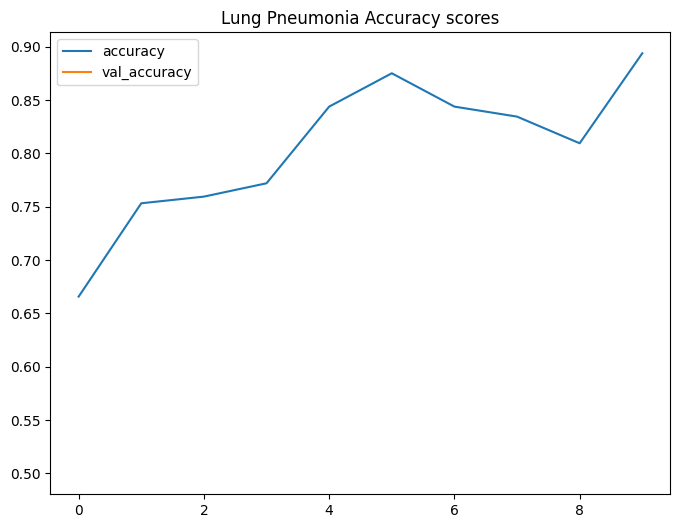

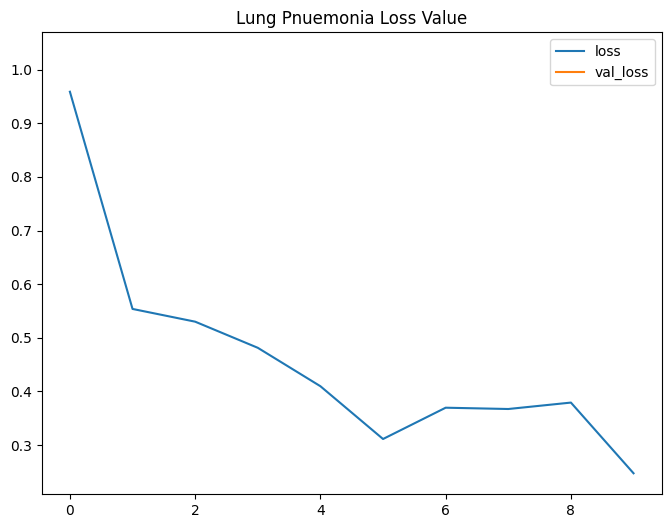

In [45]:
plt.figure(figsize=(8,6))
plt.title('Lung Pneumonia Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Lung Pnuemonia Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to generate heatmap
def generate_heatmap(model, img_path, image_dims):
    img = cv2.imread(img_path)

    # Check if the image is loaded successfully
    if img is None:
        print(f"Error: Unable to load the image from path: {img_path}")
        return

    # Resize the image
    img = cv2.resize(img, (image_dims, image_dims))

    # Check if the resized image is empty
    if img.size == 0:
        print("Error: Empty image after resizing.")
        return

    img_array = np.expand_dims(img, axis=0) / 255.0

    # Get the feature maps and the model prediction
    last_conv_layer, predictions = heatmap_model(img_array)


    # Extract the class activation map
    grad_model = Model(heatmap_model.inputs, [last_conv_layer, heatmap_model.get_layer('dense_1').output])

    # Compute the gradient of the top predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        output = predictions[:, class_idx]

    # Extract the gradients
    grads = tape.gradient(output, last_conv_layer_output)

    # Compute the mean intensity of the gradient for each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU to the resulting heatmap
    heatmap = tf.maximum(heatmap, 0)

    # Normalize the heatmap
    heatmap /= tf.reduce_max(heatmap)

    # Resize the heatmap to match the original image size
    heatmap = tf.image.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert the heatmap to a NumPy array
    heatmap = heatmap.numpy()

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap[..., np.newaxis], 0.4, 0)

    # Display the original image, heatmap, and superimposed image
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='viridis')
    plt.title('Class Activation Map')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Superimposed Image')

    plt.show()

